# Introduction to Deep Learning with Lasagne

## Before starting, a review of concepts ..
### Supervised Learning

La forma más comun de *machine learning*, sea profundo o no, es el aprendizaje supervisado.
Si queremos realizar un clasificador a partir de imagenes, vamos a recolectar las mismas y asociarles una etiqueta. En etapa de entrenamiento, una imagen es mostrada al clasificador y este genera una salida en forma de vector con *scores*, uno para cada categoría. La idea es que la categoría deseada tenga el *score* más alto posible. 

![knobs](../images/workflow.png "workflow")

Workflow tomado de [Deep learning for computational biology](http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full)

Durante el entrenamiento calculamos una función que mide el error o distancia entre los *scores* que genera nuestro clasificador y los valores reales. Con el resultado de esta función, el clasificador modifica sus parametros para reducir este error. Estos parametros, usualmente llamados pesos, se pueden ver como "perillas" que definen la función entrada-salida de nuestro clasificador.


![knobs](../images/knobs.jpg "knobs")


## Redes neuronales

Ahora, pensemos en un problema, donde tenemos acceso a datos etiquetados del tipo $(x_i, y_i)$. Las redes neuronales nos permiten definir hipotesis no lineales y complejas de la forma $h_{W, b}(x)$, donde $W, b$ son los parametros que podemos adaptar a nuestros datos $(x_i, y_i)$.

![knobs](../images/rn.png "rn")

Consideremos una red neuronal con $N$ capas, las capas de entrada y salida estan representadas respectivamente como $X_0$ y $X_N$, donde el vector $X_{n-1}$ es la capa de entrada de $n$ (con $n=1, \cdots, N$).
Si $W_n$ es la matriz de pesos y $b_n$ el vector de bias, la salida de la capa $X_n$, puede ser representada de la siguiente manera:

$X_n = f(W_{n}X_{n-1} + b_n)$

Donde $f$ es la función de activación.

![activation](../images/activation.png "activation cheatsheet https://www.quora.com/What-is-the-role-of-the-activation-function-in-a-neural-network")
Imagen de [https://www.quora.com/What-is-the-role-of-the-activation-function-in-a-neural-network](https://www.quora.com/What-is-the-role-of-the-activation-function-in-a-neural-network)

Para ajustar los pesos, el algoritmo de aprendizaje computa el gradiente del vector, por cada peso, indicando por que cantidad el error se incrementaría o reduciría si el peso se aumentara en una pequeña cantidad. Luego el vector del peso es actualizado en la dirección opuesta al gradiente.

La **función objetivo**, promedidada sobre todos los elementos del entrenamiento, se puede ver como un paisaje montañoso. El vector del gradiente negativo nos indica la dirección hacia el terreno próximo con menor error, llevandonos asi al mínimo posible.

In [1]:
from lasagne import objectives
dir(objectives)

Using gpu device 0: GeForce GTX 860M (CNMeM is disabled, CuDNN not available)


['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'aggregate',
 'align_targets',
 'as_theano_expression',
 'binary_accuracy',
 'binary_crossentropy',
 'binary_hinge_loss',
 'categorical_accuracy',
 'categorical_crossentropy',
 'multiclass_hinge_loss',
 'squared_error',
 'theano']

In [2]:
from lasagne import nonlinearities
dir(nonlinearities)

['LeakyRectify',
 'SELU',
 'ScaledTanH',
 'ScaledTanh',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'elu',
 'identity',
 'leaky_rectify',
 'linear',
 'rectify',
 'selu',
 'sigmoid',
 'softmax',
 'softplus',
 'tanh',
 'theano',
 'very_leaky_rectify']

Para llevar esta busqueda de error mínimo a la practica, se utiliza **Stochastic Gradient Descent**, esto consta de mostrar los vectores de entrada de un subconjunto de datos de entrenamiento, se computan las salidas, sus errores, se computa el gradiente para esos ejemplos y se ajustan los pesos acorde. Este proceso se repite por sobre varios subconjuntos de ejemplos hasta que el promedio de la función objetivo deja de decrecer.

Dado un problema de reconocimiento, la tarea del entrenamiento consiste en encontrar el conjunto de parametros óptimos $\{W_{n}, b_{n}\}$ que minimizan el error de clasificación.
Para determinar como estos parámetros se deberían modificar para reducir el error, se utiliza comunmente un algortimo de *gradient descent*.

La predicción del error la denotamos como  $e(X_{N}, X_{true})$. El gradiente de $e(X_{N}, X_{true})$ es calculado teniendo en cuenta los parámetros del modelo $\{W_{n}, b_{n}\}$.
Los valores de cada capa son actualizados mediante la toma de pequeños pasos:

$W_{n} \gets W_{n} - \eta  \frac{\partial e(X_{N}, X_{true})}{\partial W_{n}}$

$b_{n} \gets b_{n} - \eta  \frac{\partial e(X_{N}, X_{true})}{\partial b_{n}}$

Donde, $\eta$ es la *tasa de aprendizaje*, un hiperparámetro que controla el tamaño del paso hacia la convergencia.

Una buena práctica es trabajar con un $\eta$ que decrece de forma lineal a medida que los *epochs* avanzaban, mientras que el *momentum* se incrementaba.

![alt text](../images/saddle_point_evaluation_optimizers.gif "gif de http://sebastianruder.com/optimizing-gradient-descent/")
Grafico de http://sebastianruder.com/optimizing-gradient-descent/

In [3]:
from lasagne import updates
dir(updates)

['OrderedDict',
 'T',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'adadelta',
 'adagrad',
 'adam',
 'adamax',
 'apply_momentum',
 'apply_nesterov_momentum',
 'get_or_compute_grads',
 'momentum',
 'nesterov_momentum',
 'norm_constraint',
 'np',
 'rmsprop',
 'sgd',
 'theano',
 'total_norm_constraint',
 'utils']

![alt text](../images/deeplearning.jpg "dl")

### But ... What is Deep Learning ?

Deep learning permite que modelos computacionales compuestos por varias capas de procesamiento puedan aprender representaciones sobre datos con múltiples niveles de abstracción y, mediante esto, descubrir representaciones precisas en grandes volúmenes de datos de forma autónoma. 
Particularmente, Convolutional Neural Networks (ConvNets) constituyen el estado del arte de varios problemas de visión computacional, dado su gran desempeño de clasificación en grandes volúmenes de imágenes. Su gran performance está basada en cuatro ideas basales: conexiones locales, pesos compartidos, pooling y el uso de varias capas. 
![alt text](../images/capas_de_abstracci.png "structure")


### ConvNets
![alt text](../images/convnets.jpg "structure from http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")

Una arquitectura clásica de ConvNet esta dada por dos etapas. La primer etapa se enfoca en **extraer características discriminantes** a distintos niveles de abstracción y la segunda se enfoca en la **clasificación** a partir de las características obtenidas previamente. La primera instancia esta compuesta por dos tipos de capas: de convolución y *pooling*.

<!---Las arquitecturas de ConvNets asumen que los datos con los que se trabajara son arreglos multidimensionales, gracias a esta suposición varias cualidades de los datos se pueden embeber en la arquitectura de la red. A diferencia de las redes neuronales convencionales, las *ConvNets* cuentan con unidades organizadas en tres dimensiones: ancho, alto y profundidad. --->

![alt text](../images/cnn.jpg "structure from http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")




### Different types of layers

In [4]:
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
                           MaxPool2DLayer, DenseLayer
from lasagne.nonlinearities import rectify

#### Dense Layers

Todas las unidades ocultas estan conectadas con todas las unidades de entrada!

In [5]:
(DenseLayer, {'num_units': 256, 'nonlinearity': rectify})

(lasagne.layers.dense.DenseLayer,
 {'nonlinearity': <function lasagne.nonlinearities.rectify>, 'num_units': 256})

#### Conv layers

En las capas de convolución, las unidades estan organizadas en *feature maps*, en las cuales cada unidad
esta conectada a *patches* locales de los *feature maps* pertenecientes a la capa anterior mediante un conjunto de pesos, llamados *filter bank*. Todas las unidades dentro de un *feature map* comparten el mismo *filter bank*, distintos *feature maps* dentro de la misma capa usan diferentes *filter banks*, la disposición de estos tiene dos justificaciones, por un lado, datos en forma de arreglos, como en nuestro caso, imágenes, subconjuntos locales tienden a estar altamente correlacionados y por otro lado la estadística local de las imágenes son invariantes a su ubicación.


![alt text](../images/Convolution_schematic.gif "gif de http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")
*http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/


In [6]:
(Conv2DLayer, {'num_filters': 32, 'filter_size': 2})

(lasagne.layers.conv.Conv2DLayer, {'filter_size': 2, 'num_filters': 32})

#### Max Pooling
Para reducir la dimensionalidad de los *feature maps*, una capa de *pooling* es ubicada entre las capas de convolución. Las capas de *pooling* eliminan los valores no máximos calculando una función de agregación, comunmente se utiliza el maximo o el promedio sobre pequeñas regiones de la entrada. El proposito general de las capas de *pooling* es reducir el costo computacional en las capas ulteriores, reduciendo el tamaño de los futuros mapas de características y otorgando una forma de invariancia traslacional.


![alt text](../images/maxpool.jpg " imagen de http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")
imagen de http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/

In [5]:
(MaxPool2DLayer, {'pool_size': 2})

(lasagne.layers.pool.MaxPool2DLayer, {'pool_size': 2})


#### Dropout

Dropout es una técnica que previene que una red caiga en *overfitting* y provee una manera de combinar de forma eficiente varias arquitecturas de redes neuronales juntas.
El termino de dropout se refiere al descarte de unidades y sus conexiones (ya sea en capas ocultas o no) en una red neuronal, este descarte es solo temporal. La forma de elección de descarte es aleatoria, a cada unidad se le asocia un valor de probabilidad $p$ independiente del resto entre [0, 1].
![alt text](../images/dropout_.png " de http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full")

imagen de http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full

In [8]:
(DropoutLayer, {'p': 0.5})

(lasagne.layers.noise.DropoutLayer, {'p': 0.5})

### Other types of layers ...
- Transformer Layer (http://papers.nips.cc/paper/5854-spatial-transformer-networks.pdf)
- Expression Layer
- Standardize Layer


http://lasagne.readthedocs.io/en/latest/modules/layers/special.html

## Lasagne


In [7]:
from IPython.display import IFrame
IFrame('http://lasagne.readthedocs.io/en/latest/', width=900, height=350)

# Let's classify the ship in the image!

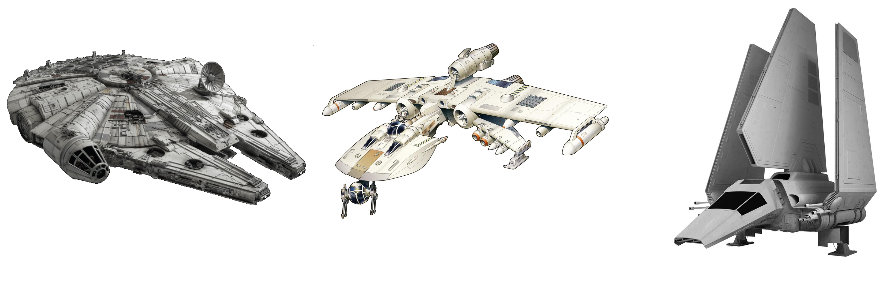

In [9]:
from IPython.display import Image
Image(filename='../images/ships.png') 

## How do our entry data look like?
![alt text](../images/dataset.png)

### Loading images to a Pandas Dataframe

In [16]:
import os
import pandas as pd
import cv2

In [2]:
def images_to_file(path_to_photos):
    """ load images from folder and write a csv and return 
    a pd dataframe with X : Images and y:labels"""
    ids = [os.path.splitext(image_id)[0] for image_id in os.listdir(path_to_photos)]
    df_out = pd.DataFrame(columns=['Image', 'Model', 'Model_enc'], index=ids)
    for image_file in os.listdir(path_to_photos):
            image = cv2.imread(os.path.join(path_to_photos, image_file), 0)
            df_out['Image'][os.path.splitext(image_file)[0]] = ' '.join(map(str, image.flatten()))
            df_out['Model'][os.path.splitext(image_file)[0]] = image_file.split('_')[0]
       
    catenc = pd.factorize(df_out['Model'])
    df_out['Model_enc'] = catenc[0]
    print(catenc)
    df_out.to_csv('../star_wars_data.csv')
    
    return df_out

In [13]:
images_to_file("../data/all/")

(array([0, 1, 1, ..., 0, 0, 1]), Index(['falcon', 'lambda', 'kwing'], dtype='object'))


Image   Model  \
falcon_165      135 94 30 14 3 7 2 7 5 7 6 4 6 5 20 58 58 20 2...  falcon   
lambda_000163   123 127 123 117 119 123 128 134 136 131 125 12...  lambda   
lambda_000164   119 117 117 120 125 129 130 130 129 132 135 13...  lambda   
lambda_052      107 108 107 105 104 103 102 100 140 158 157 15...  lambda   
kwing_00098     0 13 43 83 104 111 124 132 138 138 130 113 101...   kwing   
kwing_000224    7 23 29 9 8 12 16 20 8 29 40 24 30 38 41 43 41...   kwing   
kwing_000121    27 18 16 17 8 0 1 7 21 23 21 7 2 2 33 68 53 53...   kwing   
lambda_092      170 174 176 176 178 182 183 181 181 180 177 17...  lambda   
falcon__154     19 21 24 25 28 31 32 32 29 44 37 20 21 50 72 8...  falcon   
lambda_0108     126 129 130 127 126 127 129 130 129 130 130 12...  lambda   
lambda_@19      201 201 201 201 202 202 202 202 201 201 202 20...  lambda   
falcon_170      11 16 44 59 56 86 64 44 38 45 61 97 89 34 31 2...  falcon   
kwing_000512    48 90 112 114 115 115 116 115 117 119 119 114 ...   kwing   
lambda_000152   123 122 123 127 130 132 134 135 134 133 132 13...  lambda   
kwing_00080     50 59 65 65 75 102 127 137 204 226 240 243 242...   kwing   
lambda_@139     161 161 161 161 161 161 161 161 161 161 161 16...  lambda   
lambda_164      23 50 87 114 116 126 86 53 76 79 94 100 102 97...  lambda   
kwing_0000057   219 220 222 223 224 224 225 225 226 227 228 22...   kwing   
falcon_118      90 92 93 96 98 96 95 98 96 91 89 93 97 98 97 9...  falcon   
falcon_#64      93 93 93 94 94 95 95 95 95 95 96 96 94 92 92 9...  falcon   
falcon_0000034  9 4 8 12 14 9 22 23 25 25 20 24 28 33 42 45 33...  falcon   
kwing_000481    29 22 18 17 15 13 10 7 8 12 12 11 15 16 55 83 ...   kwing   
lambda_470      119 118 116 115 114 114 113 112 117 119 123 12...  lambda   
lambda_@27      202 201 201 201 201 200 200 199 199 199 200 19...  lambda   
falcon_0080     7 35 44 49 48 51 55 55 55 56 58 55 37 44 75 19...  falcon   
lambda_#99      125 124 123 124 124 125 125 125 124 124 123 12...  lambda   
lambda_x33      134 135 136 136 136 135 136 136 137 137 138 13...  lambda   
lambda_#80      94 91 88 86 87 88 90 90 91 90 88 86 85 84 83 8...  lambda   
falcon_#70      89 90 88 86 89 92 93 93 91 87 85 86 89 90 88 8...  falcon   
kwing_@107      113 45 108 98 116 108 104 115 107 107 108 108 ...   kwing   
...                                                           ...     ...   
kwing_0007      11 11 10 8 6 6 7 7 10 10 10 10 11 11 12 12 11 ...   kwing   
lambda_#33      94 94 94 94 94 95 96 97 98 98 99 98 97 96 95 9...  lambda   
falcon_0000052  38 37 35 33 38 29 10 8 6 8 8 6 11 16 16 26 26 ...  falcon   
lambda_@97      205 205 205 206 206 205 205 205 205 205 205 20...  lambda   
falcon_0014     149 201 176 158 168 167 152 139 133 132 139 12...  falcon   
falcon_078      0 2 7 25 51 34 0 8 5 3 6 11 16 20 16 8 1 9 1 0...  falcon   
kwing_0000176   248 247 248 252 254 254 254 255 221 207 207 21...   kwing   
kwing_00123     72 70 79 75 69 70 87 82 81 86 78 82 91 91 91 8...   kwing   
kwing_000306    180 189 195 197 198 199 201 204 207 206 208 21...   kwing   
lambda_0033     3 7 8 5 3 4 4 2 14 20 22 32 41 41 40 37 21 10 ...  lambda   
kwing_0015      68 68 69 71 71 71 74 78 75 70 67 67 66 64 66 7...   kwing   
falcon_#120     103 105 107 110 111 111 111 110 111 113 117 12...  falcon   
kwing_+115      158 158 151 111 158 150 162 157 156 156 157 15...   kwing   
lambda_000145   123 125 126 125 125 128 129 129 128 127 128 13...  lambda   
lambda_397      228 233 219 205 215 217 221 223 171 154 52 13 ...  lambda   
lambda_x16      134 135 136 136 136 135 136 136 137 137 138 13...  lambda   
kwing_@120      113 45 108 98 116 108 104 115 107 107 108 108 ...   kwing   
lambda_020      16 13 15 21 20 22 29 22 23 13 28 55 70 75 73 6...  lambda   
falcon_#147     128 130 131 131 130 130 132 133 135 134 134 13...  falcon   
falcon_#76      97 98 96 93 93 95 96 95 93 96 96 95 93 93 91 9...  falcon   
lambda_198      103 104 104 103 103 103 104 105 105 105 

### Cómo quedo el archivo que generamos?

In [3]:
!head ../star_wars_data.csv

,Image,Model,Model_enc
falcon_165,135 94 30 14 3 7 2 7 5 7 6 4 6 5 20 58 58 20 20 18 17 26 22 29 20 6 11 10 14 47 81 140 144 150 163 146 99 115 117 140 141 153 157 93 102 204 139 115 140 150 63 14 20 35 38 32 63 49 53 42 65 67 75 107 159 117 37 68 113 43 102 57 30 37 52 20 12 22 23 34 24 28 29 66 94 56 38 46 53 39 23 53 58 21 63 119 152 81 76 148 161 253 228 172 212 242 228 223 227 213 168 177 164 138 105 125 147 144 144 132 140 130 124 130 127 137 174 196 79 41 36 18 11 5 5 4 6 5 5 7 9 5 15 48 60 22 13 14 18 25 21 25 24 11 11 9 10 36 69 125 143 145 153 150 104 113 113 128 142 145 165 160 109 161 166 133 126 161 79 10 39 36 43 40 43 47 37 47 56 69 114 136 157 88 45 89 137 76 87 111 74 61 34 15 14 18 25 16 24 16 23 69 90 56 36 35 45 39 32 34 49 26 55 139 100 65 79 67 152 255 221 171 225 224 192 167 166 177 162 164 155 121 107 124 157 156 128 128 132 129 132 156 183 202 206 189 28 42 42 17 19 31 1 16 8 5 5 8 11 5 10 36 60 28 9 11 16 18 20 23 25 16 10 11 9 24 58 110 137 136 141 149 104 99

### Ahora a darle formato a nuestros datos para nuestra red ...

In [6]:
import numpy as np
from sklearn.utils import shuffle

In [7]:
def load(images_dir="../data/all/", star_wars_fn = '../star_wars_data.csv'):
    """Load images and target class for Falcon, Lambda and K-wing ships."""
    
    if os.path.exists(star_wars_fn):
        df = pd.read_csv(star_wars_fn)
    else:
        df = images_to_file(images_dir)
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    X = np.vstack(df['Image'].values) / 255.
    X = X.astype(np.float32)

    y = df['Model_enc'].values
    X, y = shuffle(X, y, random_state=42)
    y = y.astype(np.int32)
    
    return X, y

### What we need to build our net ??

In [8]:
import warnings; warnings.simplefilter('ignore')
import theano
import lasagne
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
                           MaxPool2DLayer, DenseLayer
from lasagne.objectives import categorical_crossentropy
from nolearn.lasagne import BatchIterator

### How can we define the architecture of our network?

In [25]:
layers_0 = [
    # layer dealing with the input data
    (InputLayer, {'shape': (None, 1, 128, 128)}),

    # first stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 16, 'filter_size': 5}),
    (Conv2DLayer, {'num_filters': 16, 'filter_size': 3}),
    (MaxPool2DLayer, {'pool_size': 2}),

    # second stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 32, 'filter_size': 3}),
    (Conv2DLayer, {'num_filters': 32, 'filter_size': 3}),
    (MaxPool2DLayer, {'pool_size': 2}),

    # two dense layers with dropout
    (DenseLayer, {'num_units': 64}),
    (DropoutLayer, {}),
    (DenseLayer, {'num_units': 64}),

    # the output layer
    (DenseLayer, {'num_units': 3, 'nonlinearity': lasagne.nonlinearities.softmax}),
]



In [46]:
layers_1 = [
    # layer dealing with the input data
    (InputLayer, {'shape': (None, 1, 128, 128)}),
    
    # first stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 16, 'filter_size': 5, 'W': lasagne.init.GlorotUniform()}),
    (MaxPool2DLayer, {'pool_size': 2}),

    # second stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 16, 'filter_size': 3, 'W': lasagne.init.GlorotUniform()}),
    (MaxPool2DLayer, {'pool_size': 2}),
    
    # two dense layers with dropout
    (DenseLayer, {'num_units': 64}),
    (DropoutLayer, {}),
    (DenseLayer, {'num_units': 64}),
    
    # the output layer
    (DenseLayer, {'num_units': 3, 'nonlinearity': lasagne.nonlinearities.softmax}),
]

In [47]:
def create_net(max_epochs=100):
    return NeuralNet(
        layers=layers_1,
        update=nesterov_momentum,
        update_learning_rate=0.008,
        regression=False,
        objective_loss_function=categorical_crossentropy,
        #batch_iterator_train=BatchIterator(batch_size=256),
        #on_epoch_finished=[
        #    AdjustVariable('update_learning_rate', start=0.03, stop=0.001),
        #    AdjustVariable('update_momentum', start=0.9, stop=0.9999)  # ,
        #],
        max_epochs=max_epochs,
        verbose=1)

### Some Hyperparameter Tuning

Some things that you want to tune:
 - Net structure
 - learning rate
 - W initialization
 - Regularization
 

![alt text](../images/split.png "http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full")
Image from [Deep learning for computational biology](http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full)

[Practical Recommendations for Gradient-Based Training of Deep Architectures - Yoshua Bengio](https://arxiv.org/pdf/1206.5533v2.pdf)

In [44]:
from sklearn.cross_validation import train_test_split
x, y = load()
x = x.reshape(-1, 1, 128, 128)
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)
print(X_train.shape)

(2924, 1, 128, 128)


In [48]:
net = create_net(20)
net.fit(X_train, y_train)

# Neural Network with 928755 learnable parameters

## Layer information

  #  name        size
---  ----------  ----------
  0  input0      1x128x128
  1  conv2d1     16x124x124
  2  maxpool2d2  16x62x62
  3  conv2d3     16x60x60
  4  maxpool2d4  16x30x30
  5  dense5      64
  6  dropout6    64
  7  dense7      64
  8  dense8      3

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -----
      1     1.09499     1.08430    1.00986      0.42906  3.35s
      2     1.07693     1.04486    1.03069      0.61709  3.34s
      3     1.02685     0.93774    1.09503      0.64786  3.32s
      4     0.92304     0.81394    1.13405      0.65128  3.32s
      5     0.83485     0.73190    1.14067      0.74359  3.31s
      6     0.72650     0.59384    1.22341      0.77949  3.32s
      7     0.67975     0.47331    1.43616      0.82051  3.33s
      8     0.52959     0.37300    1.41980      0.87009  3.35s
      9     0.44453     0.30760    1

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7fbd8c5bba90>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7fbd8c5bba58>,
     check_input=True, custom_scores=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (None, 1, 128, 128)}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'num_filters': 16, 'filter_size': 5, 'W': <lasagne.init.GlorotUniform object at 0x7fbd4c0ed048>}), (<class 'lasagne.layers.pool.MaxPool2DLayer'>, {'pool_size': 2}), (<cla....layers.dense.DenseLayer'>, {'num_units': 3, 'nonlinearity': <function softmax at 0x7fbd8e007c80>})],
     loss=None, max_epochs=20, more_params={},
     objective=<function objective at 0x7fbd8c040ae8>,
     objective_loss_function=<function categorical_crossentropy at 0x7fbd8dfe8d08>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog object at 0x7fbd77701160>],
     on_training_finished=[],
     on_tr

### How can we test our net?

In [50]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from nolearn.lasagne import visualize

In [51]:
print(classification_report(y_test, net.predict(X_test)))

             precision    recall  f1-score   support

          0       0.99      0.96      0.98       330
          1       0.97      0.98      0.98       473
          2       0.97      0.98      0.98       451

avg / total       0.98      0.98      0.98      1254



In [52]:
accuracy_score(y_test, net.predict(X_test))

0.97607655502392343

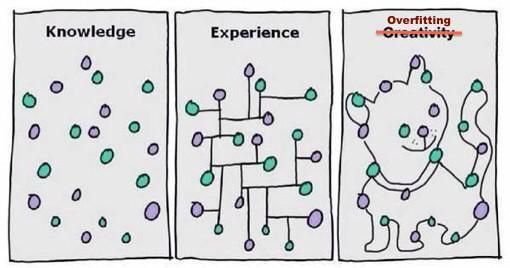

In [28]:
from IPython.display import Image
Image(filename='../images/overfitting.jpg') 

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

#### Looking up our *learning rate*

![alt text](../images/lr.png "http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full")
Imagen de [Deep learning for computational biology](http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full)

<module 'matplotlib.pyplot' from '/usr/lib/python3.6/site-packages/matplotlib/pyplot.py'>

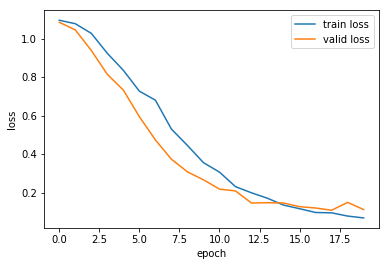

In [54]:
visualize.plot_loss(net)

#### Cómo le fue a nuestra red entrenada en cuanto a clasificación de nuevas naves?
![alt text](../images/confusion_matrix.png)

In [55]:
def plot_matrix(clf, X_test, y_test):
    """Plot Confussion Matrix from a given classifier"""
   
    plt.clf()
    
    cm = confusion_matrix(y_test, clf.predict(X_test))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    cm_normalized[np.isnan(cm_normalized)] = 0.0
    print(cm_normalized)
    plt.tick_params(labelsize=20)

    ax = plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    cb = plt.colorbar()
    cb.ax.tick_params(axis='both', labelsize=20)
    plt.ylabel("True label", fontsize=20)
    plt.xlabel("Predicted label", fontsize=20)
    plt.xticks(range(3),range(3))
    plt.yticks(range(3),range(3))
    
    return ax


Normalized confusion matrix
[[ 0.96363636  0.01515152  0.02121212]
 [ 0.00634249  0.98308668  0.01057082]
 [ 0.00221729  0.01995565  0.97782705]]
[[318   5   7]
 [  3 465   5]
 [  1   9 441]]


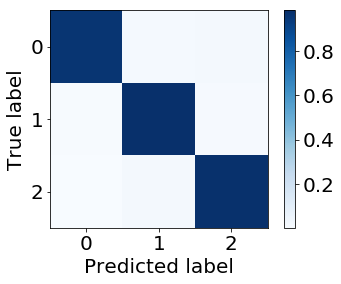

In [56]:
plot_matrix(net, X_test, y_test)
print(confusion_matrix(y_test, net.predict(X_test)))

### You can save your network in a pickle!
![alt text](../images/pickle.jpg)

In [57]:
import pickle

In [58]:
with open('../data/ship_classifier.pickle', 'wb') as f:
        pickle.dump(net, f, -1)

In [59]:
net = None
with open('../data/ship_classifier.pickle', 'rb') as f:
       net = pickle.load(f)

In [60]:
from nolearn.lasagne import PrintLayerInfo
layer_info = PrintLayerInfo()

net.verbose = 1
net.initialize()
layer_info(net)

# Neural Network with 928755 learnable parameters

## Layer information

  #  name        size
---  ----------  ----------
  0  input0      1x128x128
  1  conv2d1     16x124x124
  2  maxpool2d2  16x62x62
  3  conv2d3     16x60x60
  4  maxpool2d4  16x30x30
  5  dense5      64
  6  dropout6    64
  7  dense7      64
  8  dense8      3



### Qué pasa dentro de la red?

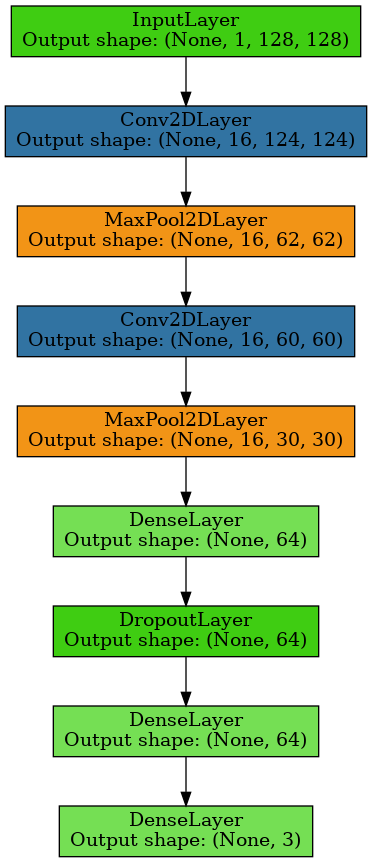

In [61]:
from nolearn.lasagne.visualize import draw_to_notebook

draw_to_notebook(net)

In [39]:
net.layers

[(lasagne.layers.input.InputLayer, {'shape': (None, 1, 128, 128)}),
 (lasagne.layers.conv.Conv2DLayer, {'filter_size': 5, 'num_filters': 32}),
 (lasagne.layers.conv.Conv2DLayer, {'filter_size': 3, 'num_filters': 32}),
 (lasagne.layers.pool.MaxPool2DLayer, {'pool_size': 2}),
 (lasagne.layers.conv.Conv2DLayer, {'filter_size': 3, 'num_filters': 64}),
 (lasagne.layers.conv.Conv2DLayer, {'filter_size': 3, 'num_filters': 64}),
 (lasagne.layers.pool.MaxPool2DLayer, {'pool_size': 2}),
 (lasagne.layers.dense.DenseLayer, {'num_units': 64}),
 (lasagne.layers.noise.DropoutLayer, {}),
 (lasagne.layers.dense.DenseLayer, {'num_units': 64}),
 (lasagne.layers.dense.DenseLayer,
  {'nonlinearity': <function lasagne.nonlinearities.softmax>, 'num_units': 3})]

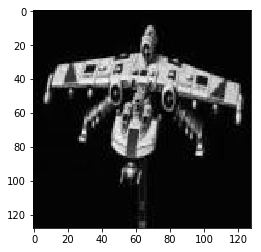

In [62]:
my_image = cv2.imread("../data/kwing.jpg", 0)
plt.imshow(my_image, cmap='gray')
X = np.vstack(my_image) / 255.
plt.imshow(X, cmap='gray')
X = X.astype(np.float32)
X = X.reshape(-1, 1, 128, 128)

In [63]:
net.predict(X)

array([2])

#### Qué tan segura esta mi red de que identifico  ??

In [64]:
proba = net.predict_proba(X)
proba, proba.sum()

(array([[  1.19743599e-02,   2.50365156e-05,   9.88000572e-01]], dtype=float32),
 0.99999994)

In [65]:
proba[0, np.argmax(proba)]

0.98800057

<module 'matplotlib.pyplot' from '/usr/lib/python3.6/site-packages/matplotlib/pyplot.py'>

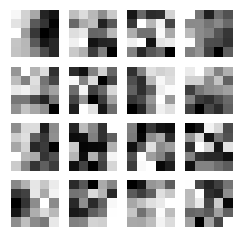

In [66]:
visualize.plot_conv_weights(net.layers_[1], figsize=(4, 4))

<module 'matplotlib.pyplot' from '/usr/lib/python3.6/site-packages/matplotlib/pyplot.py'>

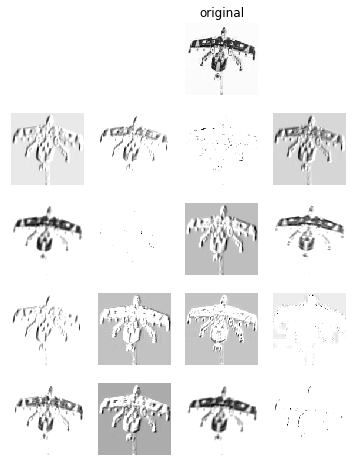

In [68]:
visualize.plot_conv_activity(net.layers_['conv2d1'], X)

### Ahora usemos nuestra red para clasificar desde video!!

In [76]:
tipos_naves = {0: 'Falcon', 1: 'Lambda', 2: 'K-wing'}

def format_net(my_image):
        X = np.vstack(my_image) / 255.
        X = X.astype(np.float32)
        X = X.reshape(-1, 1, 128, 128)
        
        return X

#### Mostrando el resultado frame por frame

In [77]:
import time
import cv2

def classifier_over_video(file_name):
    cap = cv2.VideoCapture(file_name)
    frames_count = cap.get(7)
    
    for frame_id in range(int(frames_count)):
        ret, frame = cap.read()
        frame_ = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame_ = cv2.equalizeHist(frame_)
        res = cv2.resize(frame_, (128, 128), interpolation = cv2.INTER_CUBIC)
        X = format_net(res)
        
        pred = tipos_naves[net.predict(X)[0]]
        proba = net.predict_proba(X)
        proba = str(proba[0, np.argmax(proba)])
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, pred, (10, 500), font, 4, (255,255,255), 2, cv2.LINE_AA)
        cv2.putText(frame, proba, (10, 800), font, 4, (255,255,255), 2, cv2.LINE_AA)
        
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        
    cap.release()
    cv2.destroyAllWindows()

In [72]:
classifier_over_video("../data/videos_demo/otro_k-wing_nerdearla.mp4")

In [73]:
import time
import cv2

def classifier_over_cam():
    cap = cv2.VideoCapture(1)
    print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    if not cap.isOpened():
        return "bad luck"
  
    while(True):
        ret, frame = cap.read()
        if frame != None:
            frame_ = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
            frame_ = cv2.equalizeHist(frame_)
            res = cv2.resize(frame_, (128, 128), interpolation = cv2.INTER_CUBIC)
            X = format_net(res)

            pred = tipos_naves[net.predict(X)[0]]
            proba = net.predict_proba(X)
            proba = str(proba[0, np.argmax(proba)])

            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(frame, pred, (10, 200), font, 2, (255,255,255), 2, cv2.LINE_AA)
            cv2.putText(frame, proba, (10, 300), font, 2, (255,255,255), 2, cv2.LINE_AA)

            cv2.imshow('frame', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            cap.release()
            break

    cap.release()
    cv2.destroyAllWindows()

In [28]:
classifier_over_cam()

640.0
480.0


#### Con una pequeña trampa podemos tener una idea mas estable sobre el video ...

In [74]:
import time
import cv2
from collections import Counter

def classifier_over_video_most_common(file_name):
    cap = cv2.VideoCapture(file_name)
    frames_count = cap.get(7)
    clase = []
    
    for frame_id in range(int(frames_count)):
        ret, frame = cap.read()
        frame_ = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame_ = cv2.equalizeHist(frame_)
        res = cv2.resize(frame_, (128, 128), interpolation = cv2.INTER_CUBIC)
        X = format_net(res)
        clase.append(net.predict(X)[0])
        font = cv2.FONT_HERSHEY_SIMPLEX
        mi_nave_frecuente = Counter(clase).most_common(1)[0][0]
        cv2.putText(frame, tipos_naves[mi_nave_frecuente], (10,500), font, 4,(255,255,255), 2, cv2.LINE_AA)
        cv2.imshow('frame', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        
    cap.release()
    cv2.destroyAllWindows()

In [75]:
classifier_over_video_most_common("../data/videos_demo/otro_k-wing_nerdearla.mp4")

### Ahora armemos una red para regresion

In [78]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

In [79]:
data_coordinates = pd.read_json("../data/landmarks.json")
data_coordinates

annotations  class  \
0     [{'class': 'point', 'x': 56.41939339381177, 'y...  image   
1     [{'class': 'point', 'x': 92.34564389570087, 'y...  image   
2     [{'class': 'point', 'x': 92.09264213160306, 'y...  image   
3     [{'class': 'point', 'x': 46.04632106580153, 'y...  image   
4     [{'class': 'point', 'x': 55.407386337420526, '...  image   
5     [{'class': 'point', 'x': 56.67239515790958, 'y...  image   
6     [{'class': 'point', 'x': 95.63466682897241, 'y...  image   
7     [{'class': 'point', 'x': 95.1286633007768, 'y'...  image   
8     [{'class': 'point', 'x': 50.34735105546431, 'y...  image   
9     [{'class': 'point', 'x': 59.202412798887686, '...  image   
10    [{'class': 'point', 'x': 47.5643316503884, 'y'...  image   
11    [{'class': 'point', 'x': 94.11665624438555, 'y...  image   
12    [{'class': 'point', 'x': 96.64667388536365, 'y...  image   
13    [{'class': 'point', 'x': 50.60035281956212, 'y...  image   
14    [{'class': 'point', 'x': 44.02230695301905, 'y...  image   
15    [{'class': 'point', 'x': 48.57633870677964, 'y...  image   
16    [{'class': 'point', 'x': 95.63466682897241, 'y...  image   
17    [{'class': 'point', 'x': 95.88766859307022, 'y...  image   
18    [{'class': 'point', 'x': 49.33534399907307, 'y...  image   
19    [{'class': 'point', 'x': 51.106356347757746, '...  image   
20    [{'class': 'point', 'x': 44.52831048121467, 'y...  image   
21    [{'class': 'point', 'x': 96.39367212126584, 'y...  image   
22    [{'class': 'point', 'x': 96.14067035716803, 'y...  image   
23    [{'class': 'point', 'x': 50.0943492913665, 'y'...  image   
24    [{'class': 'point', 'x': 46.805326358094966, '...  image   
25    [{'class': 'point', 'x': 47.311329886290586, '...  image   
26    [{'class': 'point', 'x': 101.95971093141767, '...  image   
27    [{'class': 'point', 'x': 101.45370740322205, '...  image   
28    [{'class': 'point', 'x': 50.34735105546431, 'y...  image   
29    [{'class': 'point', 'x': 47.81733341448621, 'y...  image   
...                                                 ...    ...   
3736                                                 []  image   
3737                                                 []  image   
3738                                                 []  image   
3739                                                 []  image   
3740                                                 []  image   
3741                                                 []  image   
3742                                                 []  image   
3743                                                 []  image   
3744                                                 []  image   
3745                                                 []  image   
3746                                                 []  image   
3747                                                 []  image   
3748                                                 []  image   
3749                                                 []  image   
3750                                                 []  image   
3751                                                 []  image   
3752                                                 []  image   
3753                                                 []  image   
3754                                                 []  image   
3755                                                 []  image   
3756                                                 []  image   
3757                                                 []  image   
3758                                                 []  image   
3759                                                 []  image   
3760                                                 []  image   
3761                                                 []  image   
3762                                                 []  image   
3763                                                 []  image   
3764                                                 []  image   
3765              

In [80]:
annotations = data_coordinates.drop(['class'], axis=1)

In [81]:
for i in range(annotations.shape[0]):
    if annotations['annotations'][i] == []:
        annotations['annotations'][i] = np.nan

In [82]:
annotations['filename'] = annotations['filename'].apply(lambda x: os.path.basename(x))
non_nan = annotations.dropna()
annotations.shape, non_nan.shape


((3766, 2), (497, 2))

In [83]:
def images_to_file_coordinates():
    """ """
    ids = non_nan['filename'].values
    
    df_out = pd.DataFrame(columns=['Image', 'x_0', 'y_0', 'x_1', 'y_1', 'x_2', 'y_2'], index=ids)
    for i, image_file in zip(non_nan.index.values, ids):
            image = cv2.imread(os.path.join('../data/all', image_file), 0)
            df_out['Image'][image_file] = ' '.join(map(str, image.flatten()))
            df_out['x_0'][image_file] = non_nan['annotations'][i][0]['x']
            df_out['y_0'][image_file] = non_nan['annotations'][i][0]['y']
            df_out['x_1'][image_file] = non_nan['annotations'][i][1]['x']
            df_out['y_1'][image_file] = non_nan['annotations'][i][1]['y']
            df_out['x_2'][image_file] = non_nan['annotations'][i][2]['x']
            df_out['y_2'][image_file] = non_nan['annotations'][i][2]['y']
    df_out.to_csv('../star_wars_data_coordinates.csv')
    return df_out

In [84]:
from sklearn import preprocessing

def load_coordinates():
    """Load images and target class for Falcon, Lambda and K-wing ships."""
    df = images_to_file_coordinates()
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    y = df[['x_0', 'y_0', 'x_1', 'y_1', 'x_2', 'y_2']].values
    print(y.shape)
    minmax = preprocessing.MinMaxScaler(feature_range=(-1, 1), copy=True)
    y = minmax.fit_transform(y)
    
    X, y = shuffle(X, y, random_state=42)
    y = y.astype(np.float32)
    
    return X, y, minmax

In [85]:
X_coor, y_coor, minmax = load_coordinates()

(497, 6)


### Extendiendo nuestras redes .. con lasagne ...

In [86]:
from nolearn.lasagne import BatchIterator
class FlipBatchIterator(BatchIterator):

    def transform(self, Xb, yb):
        Xb, yb = super(FlipBatchIterator, self).transform(Xb, yb)

        # Flip half of the images in this batch at random:
        bs = Xb.shape[0]
        indices = np.random.choice(bs, bs/2, replace=False) # /2 choose all
        Xb[indices] = Xb[indices, :, :, ::-1]

        if yb is not None:
            # Horizontal flip of all x coordinates:
            yb[indices, ::2] = yb[indices, ::2] * -1

        return Xb, yb

In [87]:
class AdjustVariable(object):
    def __init__(self, name, start=0.03, stop=0.001):
        self.name = name
        self.start, self.stop = start, stop
        self.ls = None

    def __call__(self, nn, train_history):
        if self.ls is None:
            self.ls = np.linspace(self.start, self.stop, nn.max_epochs)

        epoch = train_history[-1]['epoch']
        new_value = np.float32(self.ls[epoch - 1])
        getattr(nn, self.name).set_value(new_value)

### Creamos nuestra red para regresionar ...

In [88]:
from lasagne import layers

def create_net_coordinate():
    l = layers.InputLayer(shape=(None, 1, 128, 128))
    l = layers.Conv2DLayer(l, num_filters= 16, filter_size=(3, 3))
    l = layers.MaxPool2DLayer(l, pool_size=2)
    #l = layers.DropoutLayer(l, p=0.3)
    l = layers.Conv2DLayer(l, num_filters= 16, filter_size=(3, 3))
    l = layers.MaxPool2DLayer(l, pool_size=2)
    #l = layers.DropoutLayer(l, p=0.4)
    l = layers.DenseLayer(l, num_units=1024)
    l = layers.DropoutLayer(l, p=0.5)
    l = layers.DenseLayer(l, num_units=1024)
    l = layers.DenseLayer(l, num_units=6, nonlinearity=None)

    return NeuralNet(
        l,
        update=nesterov_momentum,
        update_learning_rate=theano.shared(np.float32(0.03)),
        update_momentum=theano.shared(np.float32(0.9)),

        regression=True,
        #batch_iterator_train=FlipBatchIterator(batch_size=75),
        #on_epoch_finished=[
        #    AdjustVariable('update_learning_rate', start=0.06, stop=0.006),
        #    AdjustVariable('update_momentum', start=0.9, stop=0.9999)  # ,
        #],
        max_epochs=100,
        verbose=1)

In [89]:
X_coor = X_coor.reshape(-1, 1, 128, 128)
X_train, X_test, y_train, y_test = train_test_split(X_coor, y_coor,
                                                            test_size=0.25,
                                                            random_state=42)
net_coor = create_net_coordinate()

In [90]:
net_coor.fit(X_train, y_train)

# Neural Network with 15804854 learnable parameters

## Layer information

  #  name    size
---  ------  ----------
  0          1x128x128
  1          16x126x126
  2          16x63x63
  3          16x61x61
  4          16x30x30
  5          1024
  6          1024
  7          1024
  8          6

  epoch    trn loss    val loss    trn/val  dur
-------  ----------  ----------  ---------  -----
      1     0.16213     0.16049    1.01021  0.48s
      2     0.15465     0.15694    0.98543  0.50s
      3     0.14873     0.15231    0.97651  0.47s
      4     0.14315     0.14413    0.99318  0.47s
      5     0.13048     0.13210    0.98770  0.47s
      6     0.11796     0.12380    0.95286  0.47s
      7     0.11023     0.11974    0.92064  0.47s
      8     0.10935     0.11479    0.95263  0.47s
      9     0.09584     0.10814    0.88626  0.48s
     10     0.08516     0.10428    0.81664  0.48s
     11     0.08369     0.09998    0.83705  0.47s
     12     0.08080     0.09461    0.85401  0.47s
  

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7fbd8c5bba90>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7fbd8c5bba58>,
     check_input=True, custom_scores=None,
     layers=[<lasagne.layers.dense.DenseLayer object at 0x7fbd313aab38>],
     loss=None, max_epochs=100, more_params={},
     objective=<function objective at 0x7fbd8c040ae8>,
     objective_loss_function=<function squared_error at 0x7fbd8dfe8d90>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog object at 0x7fbdbd0a1208>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo object at 0x7fbdbd0a1160>],
     regression=True, scores_train=[], scores_valid=[],
     train_split=<nolearn.lasagne.base.TrainSplit object at 0x7fbd8c5bbb38>,
     update=<function nesterov_momentum at 0x7fbd8dfea8c8>,
     update_learning_rate=<TensorType(float32, scalar)>,
     update

<module 'matplotlib.pyplot' from '/usr/lib/python3.6/site-packages/matplotlib/pyplot.py'>

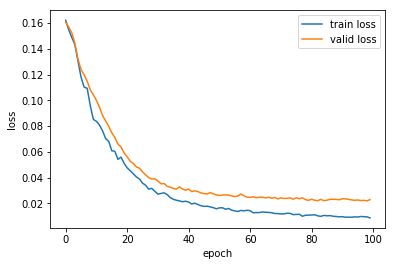

In [91]:
%matplotlib inline
visualize.plot_loss(net_coor)

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
y_pred = net_coor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(explained_variance_score(y_test.ravel(), y_pred.ravel()))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred)) 

0.172407
0.821721434593
0.0914461
0.818215577746


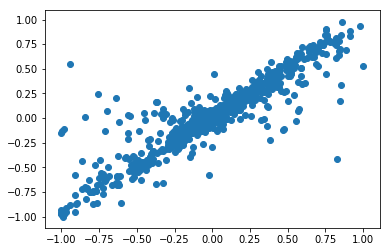

(0.90650749, 2.438255330671595e-282)

In [93]:
from scipy.stats import pearsonr
plt.clf()
plt.scatter(y_test, net_coor.predict(X_test))
plt.show()
pearsonr(y_test.ravel(), net_coor.predict(X_test).ravel())

In [94]:
def plot_sample(img, y, axis, move=48):
    axis.imshow(img, cmap='gray')
    print(y[0::2])
    print(y[1::2])
    axis.scatter(y[0::2], y[1::2], marker='x', s=5)

In [95]:
y_pred[0].reshape((3, 2))


array([[-0.03191215,  0.93837112],
       [ 0.1345592 ,  0.80427468],
       [ 0.35109657,  0.27057403]], dtype=float32)

In [96]:
minmax.inverse_transform(y_pred[0].reshape((1, -1)))

array([[  69.45625305,  124.3768158 ,   69.92570496,  110.71688843,
          72.29701233,   77.03874969]], dtype=float32)

[ 69.45625305  69.92570496  72.29701233]
[ 124.3768158   110.71688843   77.03874969]


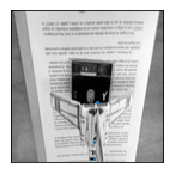

[ 66.23056793  71.90910339  72.26129913]
[ 70.06257629  63.13158417  60.36178207]


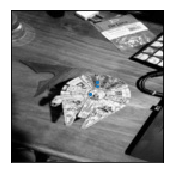

[ 39.84222031  69.85390472  98.52637482]
[ 59.18894577  61.17391968  60.58583069]


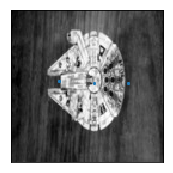

[ 70.03630066  71.38681793  69.83855438]
[ 83.98054504  73.88143158  51.63008499]


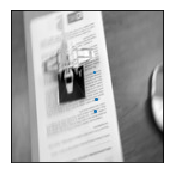

[ 44.98754883  52.99981308  60.05810165]
[ 32.87549591  65.60482025  93.03154755]


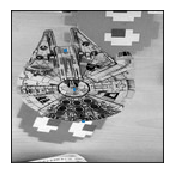

[ 65.34355164  62.92370224  63.80165863]
[ 103.48669434   87.00020599   75.74686432]


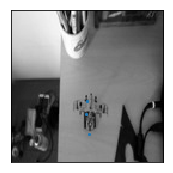

[ 83.40179443  64.44551086  46.50800705]
[ 73.95368958  70.81906128  65.09316254]


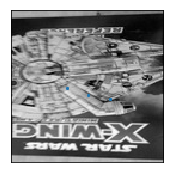

[ 70.40399933  71.7424469   73.86734772]
[ 79.93473053  56.71291351  22.05688858]


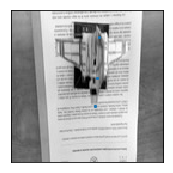

[ 69.16608429  70.54766846  75.15327454]
[ 74.73268127  51.66920853  17.84500122]


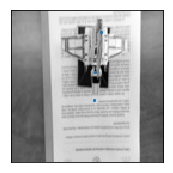

[ 54.65871811  61.8921814   66.87528992]
[  48.43128586   78.54090881  102.05197144]


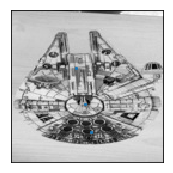

[ 60.2358551   60.96960831  63.50227737]
[ 55.65667725  71.92281342  90.49856567]


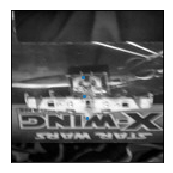

[ 101.5485611    79.76729584   50.76472092]
[ 63.78911209  62.16731262  57.65852737]


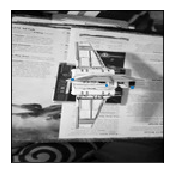

[ 65.65750122  66.80653381  67.13497925]
[ 73.08531189  87.33255005  97.69881439]


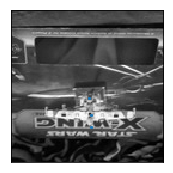

[ 104.31267548   65.60624695   28.28987503]
[ 61.720047    61.43274689  60.50814438]


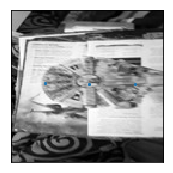

[ 65.25466919  65.49660492  64.72348022]
[ 105.39736938   92.35662079   78.981987  ]


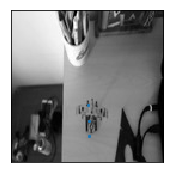

[ 73.22558594  77.0411377   83.79108429]
[ 126.6699295    85.49557495   36.74411011]


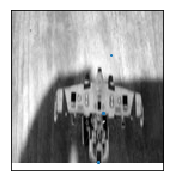

[ 68.15187836  69.42324829  71.74690247]
[ 97.6434021   71.99065399  38.49436951]


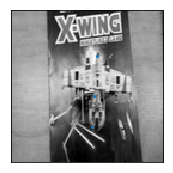

[ 62.20310211  63.12162399  66.21370697]
[ 95.43515015  78.68725586  48.49838638]


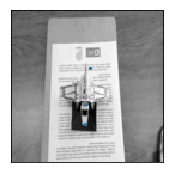

[ 96.18092346  78.80932617  55.64382172]
[ 77.66738129  67.18128204  54.37291336]


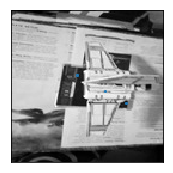

[ 71.91241455  25.09973145   1.16641223]
[ 56.11644363  58.25873184  58.73239899]


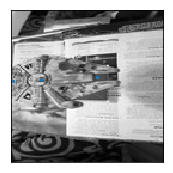

[ 56.8188591   20.94635391   2.79287839]
[ 56.81593323  62.17034149  61.56869507]


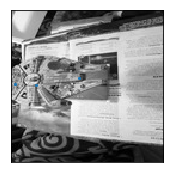

[ 68.12665558  60.385849    46.31515884]
[ 91.98419952  81.72657776  64.11856079]


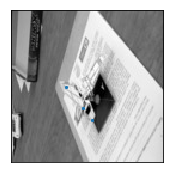

[ 73.8722229   40.20910263  15.34515953]
[ 61.05401993  64.26403046  65.23406982]


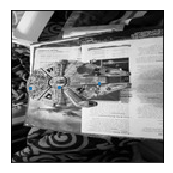

[ 66.13504028  77.58761597  89.07620239]
[ 90.57445526  66.59629822  48.33855057]


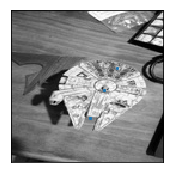

[ 95.19903564  97.14789581  98.08945465]
[ 111.42668915   71.73310852   29.55579948]


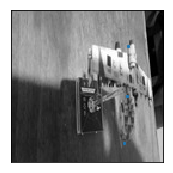

[ 103.55925751   74.44049835   21.47479248]
[ 64.70309448  68.09471893  66.48001862]


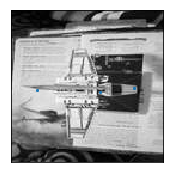

[ 63.16501999  63.13167572  58.11399078]
[ 100.10640717   68.0421524    20.32868576]


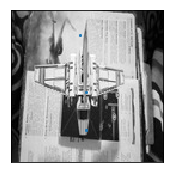

[ 80.48352814  60.18840408  49.20433807]
[ 91.95470428  78.80442047  62.03631973]


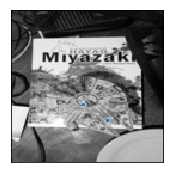

[ 53.39450073  66.85357666  81.68561554]
[ 63.68828201  64.7883606   65.49359131]


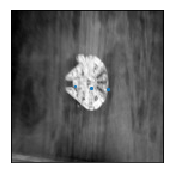

[ 69.17914581  70.01494598  72.86151123]
[ 121.42649078  108.2960968    72.88700104]


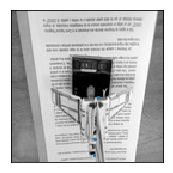

[ 109.57537842   67.34387207   28.10272598]
[ 62.17046738  63.71243286  63.03658295]


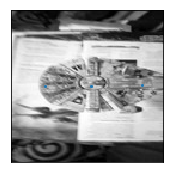

[ 71.18166351  67.85047913  66.56037903]
[ 93.73800659  61.24508667  24.3767643 ]


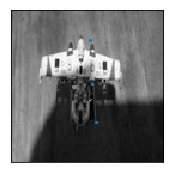

[ 38.88389587  68.65231323  97.71304321]
[ 58.92536545  59.60665512  59.28582382]


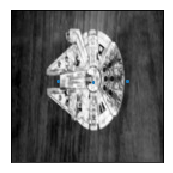

[ 65.9948349   64.26028442  63.74843216]
[ 104.43398285   91.134758     78.00222778]


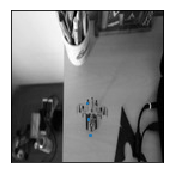

[ 50.7630043   64.95861816  79.37769318]
[ 63.92261505  65.83259583  66.95630646]


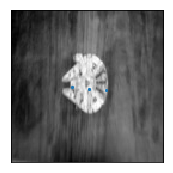

[ 44.04572296  46.37852478  54.4846344 ]
[ 108.42623901   78.52679443   23.1588726 ]


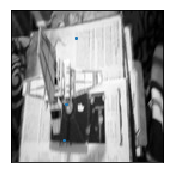

[ 92.88021088  64.49581909  18.13821983]
[ 63.37485886  66.88631439  64.19816589]


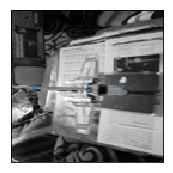

[ 75.5976944   40.08841705  13.26656151]
[ 58.6289444   59.99663162  62.13161469]


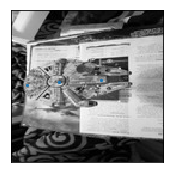

[ 66.83677673  66.28715515  67.40918732]
[ 98.41923523  70.98810577  41.39240646]


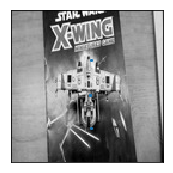

[ 65.32381439  67.90248108  64.88385773]
[ 99.20642853  81.21487427  48.71971512]


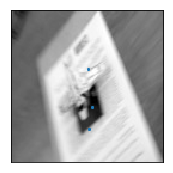

[ 51.4201355   66.42217255  80.88874054]
[ 64.11669922  65.49599457  66.80065918]


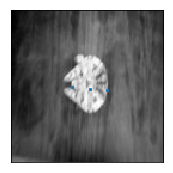

[ 50.69327927  66.15619659  81.71453857]
[ 64.59093475  65.3141861   67.14406586]


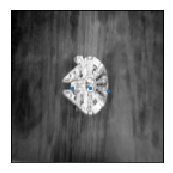

[ 91.59873962  42.64086914   7.05365658]
[ 60.37701797  61.13914108  62.69422913]


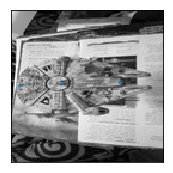

[ 83.84653473  43.73007584  13.5918684 ]
[ 63.30301285  65.94146729  69.4335556 ]


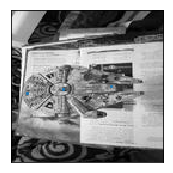

[ 64.91607666  69.62446594  73.98881531]
[ 96.89535522  74.92779541  39.04290009]


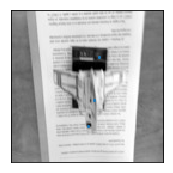

[ 80.2827301   77.34738159  75.89118958]
[ 121.97813416   73.99906921   19.89378357]


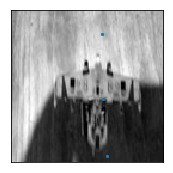

[ 67.82811737  66.77927399  64.21131897]
[ 62.509758    36.31973267  13.54255772]


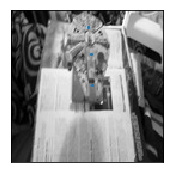

[ 69.43054962  67.92029572  60.52993774]
[ 62.90539169  69.12098694  70.89679718]


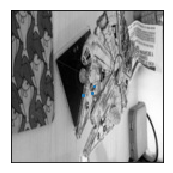

[ 70.10639191  67.04076385  67.47473145]
[ 93.88459015  69.07302856  33.18898392]


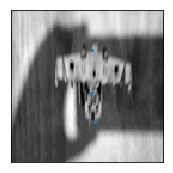

[ 91.17021179  78.07202148  64.93202209]
[ 68.30194092  68.9029541   68.17595673]


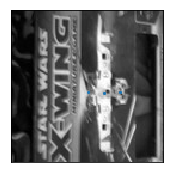

[ 60.48456573  61.35665131  62.64282608]
[ 65.20866394  78.81770325  94.20031738]


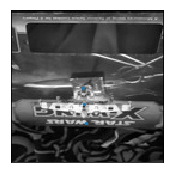

[ 65.71272278  65.1366806   63.86304092]
[ 107.88166809   96.21788025   83.89376831]


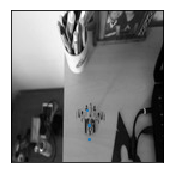

[ 75.26312256  57.10904312  26.40163994]
[ 69.32141113  65.69664001  60.26811981]


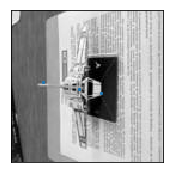

[ 99.78033447  67.4546051   17.13024521]
[ 83.53968048  85.22353363  93.66001129]


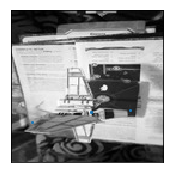

[ 81.62008667  36.96604919   4.78553963]
[ 57.71728897  60.85011292  63.63290787]


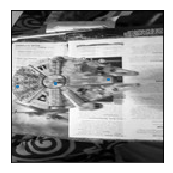

[ 67.08068085  63.99862671  63.72669983]
[ 103.03501129   88.95339203   75.67837524]


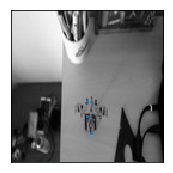

[ 69.41572571  59.8677063   54.70521545]
[ 53.36074066  57.79776382  58.24584579]


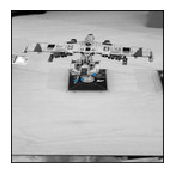

[ 83.84653473  43.73007584  13.5918684 ]
[ 63.30301285  65.94146729  69.4335556 ]


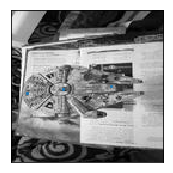

[ 76.31629944  74.94966125  68.26222229]
[ 95.22241211  70.49984741  42.8406868 ]


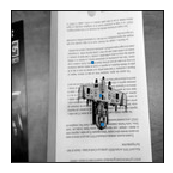

[ 79.3254776   50.5123291   32.48045731]
[ 58.3850708   64.13201141  66.25169373]


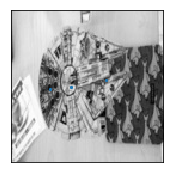

[ 110.72676849   69.30764008   26.89687538]
[ 59.27331161  60.60749817  63.25089645]


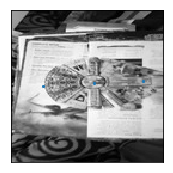

[ 65.69478607  66.89810181  66.28190613]
[ 113.4077301   101.06926727   88.88378906]


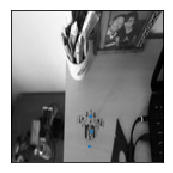

[ 60.56225967  63.05057144  64.1698761 ]
[ 56.37101746  76.67191315  87.90023041]


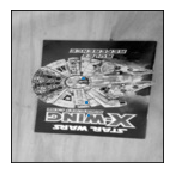

[ 66.13445282  63.72184753  63.99158859]
[ 104.462677     89.55488586   76.94739532]


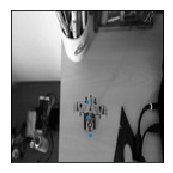

[ 85.56394958  87.39188385  85.24784851]
[ 104.26470184   50.48312378    2.07149959]


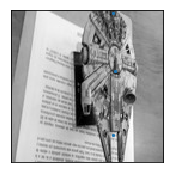

[ 69.57997131  68.84725189  67.697258  ]
[ 78.18954468  53.55075455  22.49839783]


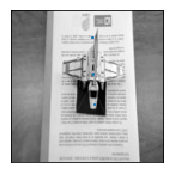

[ 69.67024994  61.40564346  46.43015289]
[ 86.40159607  77.03365326  61.6765213 ]


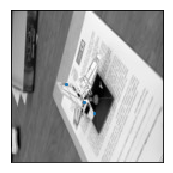

[ 66.65552521  69.66421509  72.44934845]
[ 77.30696106  52.42445755  25.14723206]


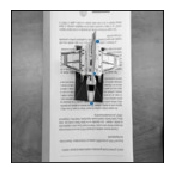

[ 57.8322525   59.8459549   63.21131134]
[ 63.77033615  76.65888214  95.33882141]


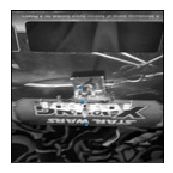

[ 71.59687042  68.44889069  66.3011322 ]
[ 81.34434509  58.98666763  25.97684479]


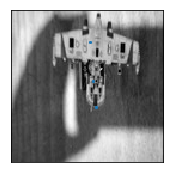

[ 75.02117157  58.35376358  31.19640923]
[ 36.9867897   39.72894287  43.51255417]


KeyboardInterrupt: 

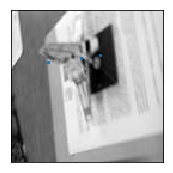

In [97]:
for i in range(X_test.shape[0]):
    plt.clf()
    fig = plt.figure(figsize=(6, 3))
    ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
    img = X_test[i].reshape(128, 128)
    plot_sample(img, minmax.inverse_transform(y_pred[i].reshape((1, -1)))[0], ax)
    plt.show()

In [100]:
import time
import cv2

def regresor_over_video(file_name):
    cap = cv2.VideoCapture(file_name)
    frames_count = cap.get(7)
    
    for frame_id in range(int(frames_count)):
        ret, frame = cap.read()
        frame_ = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame_ = cv2.equalizeHist(frame_)
        res = cv2.resize(frame_, (128, 128), interpolation = cv2.INTER_CUBIC)
        X = format_net(res)

        y_pred = minmax.inverse_transform(net_coor.predict(X)).ravel()
        for i in range(0, y_pred.shape[0], 2):
            new_scale = int(y_pred[i]*(frame.shape[1]/128.)), int(y_pred[i + 1] * (frame.shape[0]/128.))
            cv2.circle(frame, new_scale, 30, 155, -1)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()

In [110]:
regresor_over_video("../data/videos_demo/lambda_regresor.mp4")

### Quiero profundizar más!

- [Neural Networks and Deep Learning free online book](http://neuralnetworksanddeeplearning.com/index.html)
- [CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/)
- [Unsupervised Feature Learning and Deep Learning.](http://deeplearning.stanford.edu/tutorial/)

![alt text](../images/bye.jpg)
